# **Evaluacion de Data set**
Tecnicatura en inteligencia artificial

Universidad Nacional de Hurlingham

Docente: Andrea Rey

Alumno : Nicolas Seivane

Librerias que voy a utilizar


In [14]:
import pandas as pd
import sklearn as sk
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    matthews_corrcoef,
    balanced_accuracy_score,
    log_loss,
    cohen_kappa_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import StratifiedKFold# .head()
# .info()
# .isnull().any()
# df.column.value_counts()
# .max()
# .min()
# .describe()

In [15]:
datos = pd.read_csv("C:\\Users\\User\\Documents\\Proyecto integrador\\heart\\heart.csv")

datos.drop_duplicates(inplace=True)
datos.dropna(inplace=True)
#datos.drop(columns=["CLASS"], inplace=True)
#datos['NSP'] = datos['NSP'].replace({1: 'Normal', 2: 'Sospechoso', 3: 'Patologico'})
indices = datos[datos['Cholesterol'] == 0].index
datos.drop(indices, inplace=True)
datos.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


In [17]:
datos.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [18]:
n_filas = len(datos)

for column in datos.columns:
    unicos = datos[column].unique()
    n_unicos = len(unicos)
    
    # Si es categórica (tipo object/category) o es numérica con pocos únicos
    if (datos[column].dtype == 'object') or (len(unicos) <= 10):
        print(f"\nColumna '{column}' (candidata categórica): {n_unicos} valores únicos")
        
        
        for unico in unicos:
                count = len(datos[datos[column] == unico])
                normalizado = count / n_filas
                print(f"   Hay {normalizado:.2%} codificado en {unico}")
    else:
        print(f"\nColumna '{column}' tiene media: {datos[column].mean():.4f}, valor maximo: {datos[column].max():.4f} y valor minimo: {datos[column].min():.4f}")


Columna 'Age' tiene media: 52.8820, valor maximo: 77.0000 y valor minimo: 28.0000

Columna 'Sex' (candidata categórica): 2 valores únicos
   Hay 75.60% codificado en M
   Hay 24.40% codificado en F

Columna 'ChestPainType' (candidata categórica): 4 valores únicos
   Hay 22.25% codificado en ATA
   Hay 22.65% codificado en NAP
   Hay 49.60% codificado en ASY
   Hay 5.50% codificado en TA

Columna 'RestingBP' tiene media: 133.0228, valor maximo: 200.0000 y valor minimo: 92.0000

Columna 'Cholesterol' tiene media: 244.6354, valor maximo: 603.0000 y valor minimo: 85.0000

Columna 'FastingBS' (candidata categórica): 2 valores únicos
   Hay 83.24% codificado en 0
   Hay 16.76% codificado en 1

Columna 'RestingECG' (candidata categórica): 3 valores únicos
   Hay 59.65% codificado en Normal
   Hay 16.76% codificado en ST
   Hay 23.59% codificado en LVH

Columna 'MaxHR' tiene media: 140.2265, valor maximo: 202.0000 y valor minimo: 69.0000

Columna 'ExerciseAngina' (candidata categórica): 2 val

In [19]:
for column in datos.columns:
    if len(datos[column].unique()) <= 10 and datos[column].dtype == 'object':
        print(column, datos[column].unique())



Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


In [20]:
for column in datos.columns:
    if len(datos[column].unique()) <= 10 and datos[column].dtype == 'object':
        unicos = datos[column].unique()
        for i in range(len(unicos)):
            datos[column] = datos[column].replace({unicos[i]: i})
        print(column, datos[column].unique())

Sex [0 1]
ChestPainType [0 1 2 3]
RestingECG [0 1 2]
ExerciseAngina [0 1]
ST_Slope [0 1 2]


C:\Users\User\AppData\Local\Temp\ipykernel_19880\495973239.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[column] = datos[column].replace({unicos[i]: i})


In [23]:
for column in datos.columns:
    if len(datos[column].unique()) > 4:
        datos[column] = (datos[column] - datos[column].mean()) / datos[column].std()

In [21]:
atributos = datos.columns[:-1]
concepto = datos.columns[-1]

datos.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [25]:
def validacion_cruzada(conjunto, atributos, concepto, k=5, random=False, agregar_unos=False, undersample=False, oversample=False):
  
  if undersample:
    cantidad_menor_concepto = conjunto[concepto].value_counts().min()
    conjunto = pd.concat([conjunto[conjunto[concepto] == valor].sample(n=cantidad_menor_concepto, random_state=42) for valor in conjunto[concepto].unique()])

  if oversample:
    cantidad_mayor_concepto = conjunto[concepto].value_counts().max()
    conjunto = pd.concat([conjunto[conjunto[concepto] == valor].sample(n=cantidad_mayor_concepto, replace=True, random_state=42) for valor in conjunto[concepto].unique()])

  if random: conjunto = conjunto.sample(frac=1, random_state=11).reset_index(drop=True)

  x = conjunto[atributos]
  if agregar_unos: x.insert(0, "Unos", 1)

  y = conjunto[concepto]

  resultados = []
  skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

  for train_index, test_index in skf.split(x, y):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        resultados.append((x_train, y_train, x_test, y_test))

  return resultados

from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(
    n_estimators=100,      # número de árboles en el bosque
    criterion="gini",      # función de calidad de la división ("gini" o "entropy")
    max_depth=None,        # profundidad máxima de cada árbol
    min_samples_split=2,   # min muestras para dividir un nodo
    min_samples_leaf=1,    # min muestras en una hoja
    max_features="sqrt",   # nº de features a considerar en cada split ("sqrt", "log2", None)
    bootstrap=True,        # si usar bootstrap samples para entrenar cada árbol
    random_state=42,       # semilla
    n_jobs=-1              # usa todos los cores
)

from sklearn.naive_bayes import GaussianNB

GaussianNB(
    var_smoothing=1e-9     # suavizado para evitar divisiones por cero
)


from sklearn.svm import SVC

SVC(
    C=1.0,                 # penalización del error (mayor C = menos margen, más sobreajuste)
    kernel="rbf",          # kernel: "linear", "poly", "rbf", "sigmoid"
    degree=3,              # grado del polinomio (si kernel="poly")
    gamma="scale",         # controla la influencia de un solo ejemplo ("scale", "auto" o un valor numérico)
    probability=True,     # si calcular probabilidades (más lento)
    random_state=42
)

from sklearn.linear_model import LogisticRegression

LogisticRegression(
    penalty="l2",          # regularización: "l1", "l2", "elasticnet", None
    C=1.0,                 # inverso de la fuerza de regularización (menor C = más regularización)
    solver="lbfgs",        # optimizador ("lbfgs", "saga", "liblinear", "newton-cg")
    max_iter=1000,         # iteraciones máximas (importante en datasets grandes)
    multi_class="multinomial",    # "ovr" (uno-vs-rest) o "multinomial"
    random_state=42
)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    matthews_corrcoef,
    balanced_accuracy_score,
    log_loss,
    cohen_kappa_score
)

    y_true_total.extend(y_test)
    y_pred_total.extend(y_pred)

print("Matriz de confusión total:\n", confusion_matrix(y_true_total, y_pred_total))

LogisticRegression(
    penalty="l2",          # regularización: "l1", "l2", "elasticnet", None
    C=1.0,                 # inverso de la fuerza de regularización (menor C = más regularización)
    solver="lbfgs",        # optimizador ("lbfgs", "saga", "liblinear", "newton-cg")
    max_iter=1000,         # iteraciones máximas (importante en datasets grandes)
    multi_class="multinomial",    # "ovr" (uno-vs-rest) o "multinomial"
    random_state=42
)

# *Regresion Logistica*

In [49]:
grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1","l2","elasticnet", None],  # 'l1' si usas solver='liblinear' o 'saga'
    "solver": ["lbfgs","saga", "newton-cg"],# según el penalty que uses, liblinear no soporta None, newton-cg no soporta l1 ni elasticnet
    "multi_class": ["ovr", "multinomial"] # si es multiclass
}
 
## cohen_kappa_score,     accuracy_score,    precision_score,     recall_score,    f1_score,    roc_auc_score,


#with open("regresion_logistica_resultados.txt", "w") as f:
with open("regresion_logistica_resultados_corazon.txt", "w") as f:
    f.write("Resultados de Regresion Logistica con validacion cruzada (5 folds):\n")
    
    for C in grid["C"]:

        for penalty in grid["penalty"]:
            for multi_class in grid["multi_class"]:
                for solver in grid["solver"]:
                    # chequeo de compatibilidad
                    if penalty == "l1" and solver not in ["liblinear", "saga"]:
                        continue
                    if penalty == "elasticnet" and solver != "saga":
                        continue
                    if penalty is None and solver not in ["lbfgs","newton-cg","sag","saga"]:
                        continue
                    if penalty is None and solver not in ["lbfgs","newton-cg","sag","saga"]:
                        continue
                    scoring_funcs = {
                                "cohen_kappa": 0,
                                "accuracy": 0,
                                "precision": 0,
                                "recall": 0,
                                "f1": 0,
                                "roc_auc": 0
                            }
                    try:
                        inicio = time.time()
                        modelo = LogisticRegression(
                            C=C,
                            penalty=penalty,
                            solver=solver,
                            l1_ratio=0.5 if penalty=="elasticnet" else None,
                            multi_class=multi_class,
                            max_iter=1000,
                            random_state=42
                        )

                        folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True)
                        
                        for x_train, y_train, x_test, y_test in folds:
                                modelo.fit(x_train, y_train)
                                pred = modelo.predict(x_test)
                                scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                probs = modelo.predict_proba(x_test)
                                if len(set(y_test)) == 2:
                                        # binaria → prob de la clase positiva
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                else:
                                        # multiclase → usar esquema OVR
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                
                        fin = time.time()
                        tiempo_total = fin - inicio
                        for key in scoring_funcs:
                            scoring_funcs[key] /= len(folds) 
                        f.write(f"\nC={C}, penalty={penalty}, solver={solver}, multi_class={multi_class} --> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")

                    except Exception as e:
                        f.write(f"\nC={C}, penalty={penalty}, solver={solver}, multi_class={multi_class} --> ERROR: {str(e)}\n")
    f.write("\n\n")
    f.write("------------------------------------------------------\n\n")
    f.write("Resultados de Regresion Logistica con validacion cruzada (5 folds) undersample:\n")
    
    for C in grid["C"]:

        for penalty in grid["penalty"]:
            for solver in grid["solver"]:
                for multi_class in grid["multi_class"]:
                    # chequeo de compatibilidad
                    if penalty == "l1" and solver not in ["liblinear", "saga"]:
                        continue
                    if penalty == "elasticnet" and solver != "saga":
                        continue
                    if penalty is None and solver not in ["lbfgs","newton-cg","sag","saga"]:
                        continue
                    scoring_funcs = {
                                "cohen_kappa": 0,
                                "accuracy": 0,
                                "precision": 0,
                                "recall": 0,
                                "f1": 0,
                                "roc_auc": 0
                            }
                    try:
                        tiempo_inicio = time.time()
                        modelo = LogisticRegression(
                            C=C,
                            penalty=penalty,
                            solver=solver,
                            l1_ratio=0.5 if penalty=="elasticnet" else None,
                            multi_class=multi_class,
                            max_iter=1000,
                            random_state=42
                        )

                        folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True, undersample=True)

                        for x_train, y_train, x_test, y_test in folds:
                                modelo.fit(x_train, y_train)
                                pred = modelo.predict(x_test)
                                scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                probs = modelo.predict_proba(x_test)
                                if len(set(y_test)) == 2:
                                        # binaria → prob de la clase positiva
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                else:
                                        # multiclase → usar esquema OVR
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")


                        fin = time.time()
                        tiempo_total = fin - tiempo_inicio
                        for key in scoring_funcs:
                            scoring_funcs[key] /= len(folds)  # Promediar las métricas

                        f.write(f"\nC={C}, penalty={penalty}, solver={solver}, multi_class={multi_class} --> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")

                    except Exception as e:
                        f.write(f"\nC={C}, penalty={penalty}, solver={solver}, multi_class={multi_class} --> ERROR: {str(e)}\n")

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

KeyboardInterrupt: 

RandomForestClassifier(
    n_estimators=100,      # número de árboles en el bosque
    criterion="gini",      # función de calidad de la división ("gini" o "entropy")
    max_depth=None,        # profundidad máxima de cada árbol
    min_samples_split=2,   # min muestras para dividir un nodo
    min_samples_leaf=1,    # min muestras en una hoja
    max_features="sqrt",   # nº de features a considerar en cada split ("sqrt", "log2", None)
    bootstrap=True,        # si usar bootstrap samples para entrenar cada árbol
    random_state=42,       # semilla
    n_jobs=-1              # usa todos los cores
)


# *Random Forest*

In [ ]:
grid = {
    "n_estimators": [50, 100, 200, 500, 1000],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 5, 7, 9],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}



#with open("Random_forest.txt", "w") as f:
with open("Random_forest_corazon.txt", "w") as f:
    f.write("Resultados de Random Forest con validacion cruzada (5 folds):\n")

    for criterion in grid["criterion"]:
        for max_depth in grid["max_depth"]:
            for min_samples_split in grid["min_samples_split"]:
                for min_samples_leaf in grid["min_samples_leaf"]:
                    for max_features in grid["max_features"]:
                        scoring_funcs = {
                                    "cohen_kappa": 0,
                                    "accuracy": 0,
                                    "precision": 0,
                                    "recall": 0,
                                    "f1": 0,
                                    "roc_auc": 0
                                }
                        try:
                            inicio = time.time()
                            modelo = RandomForestClassifier(
                                criterion=criterion,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                random_state=42
                            )

                            folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True)

                            for x_train, y_train, x_test, y_test in folds:
                                    modelo.fit(x_train, y_train)
                                    pred = modelo.predict(x_test)
                                    scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                    scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                    scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                    scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                    scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                    probs = modelo.predict_proba(x_test)
                                    if len(set(y_test)) == 2:
                                        # binaria → prob de la clase positiva
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                    else:
                                        # multiclase → usar esquema OVR
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                    
                            fin = time.time()
                            tiempo_total = fin - inicio
                            for key in scoring_funcs:
                                scoring_funcs[key] /= len(folds) 
                            f.write(f"\ncriterion={criterion}, max_depth={max_depth}, min_samples_split={min_samples_split}, "
                                    f"min_samples_leaf={min_samples_leaf}, max_features={max_features} "
                                    f"--> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")
                        except Exception as e:
                            f.write(f"\ncriterion={criterion}, max_depth={max_depth}, min_samples_split={min_samples_split}, "
                                    f"min_samples_leaf={min_samples_leaf}, max_features={max_features} --> ERROR: {str(e)}\n")
    f.write("\n\n")
    f.write("------------------------------------------------------\n\n")
    f.write("Resultados de Random Forest con validacion cruzada (5 folds) undersample:\n")
    
    for criterion in grid["criterion"]:
        for max_depth in grid["max_depth"]:
            for min_samples_split in grid["min_samples_split"]:
                for min_samples_leaf in grid["min_samples_leaf"]:
                    for max_features in grid["max_features"]:
                        scoring_funcs = {
                                    "cohen_kappa": 0,
                                    "accuracy": 0,
                                    "precision": 0,
                                    "recall": 0,
                                    "f1": 0,
                                    "roc_auc": 0
                                }
                        try:
                            inicio = time.time()
                            modelo = RandomForestClassifier(
                                criterion=criterion,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                random_state=42
                            )

                            folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True, undersample=True)

                            for x_train, y_train, x_test, y_test in folds:
                                    modelo.fit(x_train, y_train)
                                    pred = modelo.predict(x_test)
                                    scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                    scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                    scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                    scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                    scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                    probs = modelo.predict_proba(x_test)
                                    if len(set(y_test)) == 2:
                                        # binaria → prob de la clase positiva
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                    else:
                                        # multiclase → usar esquema OVR
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                    
                            fin = time.time()
                            tiempo_total = fin - inicio
                            for key in scoring_funcs:
                                scoring_funcs[key] /= len(folds) 
                            f.write(f"\ncriterion={criterion}, max_depth={max_depth}, min_samples_split={min_samples_split}, "
                                    f"min_samples_leaf={min_samples_leaf}, max_features={max_features} "
                                    f"--> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")
                        except Exception as e:
                            f.write(f"\ncriterion={criterion}, max_depth={max_depth}, min_samples_split={min_samples_split}, "
                                    f"min_samples_leaf={min_samples_leaf}, max_features={max_features} --> ERROR: {str(e)}\n")

GaussianNB(
    var_smoothing=1e-9     # suavizado para evitar divisiones por cero
)


# *Naive Bayes*

In [ ]:
grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  
}

#with open("Naiva_Bayes.txt", "w") as f:
with open("Naiva_Bayes_corazon.txt", "w") as f:
    f.write("Resultados de Naive Bayes con validacion cruzada (5 folds):\n")

    for var_smoothing in grid["var_smoothing"]:
                        scoring_funcs = {
                                    "cohen_kappa": 0,
                                    "accuracy": 0,
                                    "precision": 0,
                                    "recall": 0,
                                    "f1": 0,
                                    "roc_auc": 0
                                }
                        try:
                            inicio = time.time()
                            modelo = GaussianNB(var_smoothing=var_smoothing)

                            folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True)

                            for x_train, y_train, x_test, y_test in folds:
                                    modelo.fit(x_train, y_train)
                                    pred = modelo.predict(x_test)
                                    scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                    scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                    scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                    scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                    scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                    probs = modelo.predict_proba(x_test)
                                    if len(set(y_test)) == 2:
                                        # binaria → prob de la clase positiva
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                    else:
                                        # multiclase
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                    
                            fin = time.time()
                            tiempo_total = fin - inicio
                            for key in scoring_funcs:
                                scoring_funcs[key] /= len(folds) 
                            f.write(f"\n var_smoothing={var_smoothing}--> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")

                        except Exception as e:
                            f.write(f"\n var_smoothing={var_smoothing}--> ERROR: {str(e)}\n")
    f.write("\n\n")
    f.write("------------------------------------------------------\n\n")
    f.write("Resultados de Naive Bayes con validacion cruzada (5 folds) undersample:\n")

    for var_smoothing in grid["var_smoothing"]:
                        scoring_funcs = {
                                    "cohen_kappa": 0,
                                    "accuracy": 0,
                                    "precision": 0,
                                    "recall": 0,
                                    "f1": 0,
                                    "roc_auc": 0
                                }
                        try:
                            inicio = time.time()
                            modelo = GaussianNB(var_smoothing=var_smoothing)
                            folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True, undersample=True)

                            for x_train, y_train, x_test, y_test in folds:
                                    modelo.fit(x_train, y_train)
                                    pred = modelo.predict(x_test)
                                    scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                    scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                    scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                    scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                    scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                    probs = modelo.predict_proba(x_test)
                                    if len(set(y_test)) == 2:
                                        # binaria → prob de la clase positiva
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                    else:
                                        # multiclase
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                    
                            fin = time.time()
                            tiempo_total = fin - inicio
                            for key in scoring_funcs:
                                scoring_funcs[key] /= len(folds) 
                            f.write(f"\n var_smoothing={var_smoothing}--> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")

                        except Exception as e:
                            f.write(f"\n var_smoothing={var_smoothing}--> ERROR: {str(e)}\n")

SVC(
    C=1.0,                 # penalización del error (mayor C = menos margen, más sobreajuste)
    kernel="rbf",          # kernel: "linear", "poly", "rbf", "sigmoid"
    degree=3,              # grado del polinomio (si kernel="poly")
    gamma="scale",         # controla la influencia de un solo ejemplo ("scale", "auto" o un valor numérico)
    probability=True,     # si calcular probabilidades (más lento)
    random_state=42
)


# *SVM*

In [ ]:
grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 15, 20, 25],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1],
    "degree": [2,3,4,5,6,7,8,9,10]
}

#with open("SVM.txt", "w") as f:
with open("SVM_corazon.txt", "w") as f:
    f.write("Resultados de SVM con validacion cruzada (5 folds):\n")

    for C in grid["C"]:
        for kernel in grid["kernel"]:
            for gamma in grid["gamma"]:
                degrees_to_use = grid["degree"] if kernel == "poly" else [3]
                for degree in degrees_to_use:
                        scoring_funcs = {
                                "cohen_kappa": 0,
                                 "accuracy": 0,
                                    "precision": 0,
                                    "recall": 0,
                                    "f1": 0,
                                    "roc_auc": 0
                                }
                        try:
                            inicio = time.time()
                            modelo = SVC(
                                  C=C,
                                    kernel=kernel,
                                    gamma=gamma,
                                    degree=degree,
                                    max_iter=1000,
                                    random_state=42,
                                    probability=True
                            )

                            folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True)

                            for x_train, y_train, x_test, y_test in folds:
                                    modelo.fit(x_train, y_train)
                                    pred = modelo.predict(x_test)
                                    scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                    scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                    scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                    scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                    scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                    probs = modelo.predict_proba(x_test)

                                    if len(set(y_test)) == 2:
                                        # binaria
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                    else:
                                        # multiclase
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                    
                            fin = time.time()
                            tiempo_total = fin - inicio
                            for key in scoring_funcs:
                                scoring_funcs[key] /= len(folds) 
                            f.write(f"\nC={C}, kernel={kernel}, gamma={gamma}, degree={degree} --> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")

                        except Exception as e:
                            f.write(f"\nC={C}, kernel={kernel}, gamma={gamma}, degree={degree} --> ERROR: {str(e)}\n")
    f.write("\n\n")
    f.write("------------------------------------------------------\n\n")
    f.write("Resultados de SVM con validacion cruzada (5 folds) undersample:\n")

    for C in grid["C"]:
        for kernel in grid["kernel"]:
            for gamma in grid["gamma"]:
                if kernel != "poly" and "degree" in grid:
                    continue
                for degree in grid["degree"]:
                        scoring_funcs = {
                                    "cohen_kappa": 0,
                                    "accuracy": 0,
                                    "precision": 0,
                                    "recall": 0,
                                    "f1": 0,
                                    "roc_auc": 0
                                }
                        try:
                            inicio = time.time()
                            modelo = SVC(
                                  C=C,
                                    kernel=kernel,
                                    gamma=gamma,
                                    degree=degree if kernel=="poly" else None,
                                    max_iter=1000,
                                    random_state=42,
                                    probability=True
                            )
                            folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True, undersample=True)

                            for x_train, y_train, x_test, y_test in folds:
                                    modelo.fit(x_train, y_train)
                                    pred = modelo.predict(x_test)
                                    scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                    scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                    scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                    scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                    scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                    probs = modelo.predict_proba(x_test)

                                    if len(set(y_test)) == 2:
                                        # binaria
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                    else:
                                        # multiclase
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                    
                            fin = time.time()
                            tiempo_total = fin - inicio
                            for key in scoring_funcs:
                                scoring_funcs[key] /= len(folds) 
                            f.write(f"\nC={C}, C={C}, gamma={gamma}, degree={degree} --> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")

                        except Exception as e:
                            f.write(f"\nC={C}, C={C}, gamma={gamma}, degree={degree} --> ERROR: {str(e)}\n")

In [15]:
from sklearn.inspection import permutation_importance

best_lr_model = LogisticRegression(C=1.0, penalty='l1', solver='saga', multi_class='ovr', max_iter=1000, random_state=42)
best_svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42, probability=True)
best_gnb_model = GaussianNB(var_smoothing=1e-09)
best_rf_model = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', random_state=42)


best_lr_model.fit(datos[atributos], datos[concepto])
best_svm_model.fit(datos[atributos], datos[concepto])
best_gnb_model.fit(datos[atributos], datos[concepto])
best_rf_model.fit(datos[atributos], datos[concepto])

with open("Importancia_corazon.txt", "w") as f:
    f.write("La importancia de las features:\n")

    f.write("Random Forest Importancia atributos:")
    feature_importances_rf = pd.Series(best_rf_model.feature_importances_, index=atributos)
    f.write(str(feature_importances_rf.sort_values(ascending=False)))
    f.write("-" * 30)


    f.write("Logistic Regression Importancia Permutacion:")
    result_lr = permutation_importance(best_lr_model, datos[atributos], datos[concepto], n_repeats=10, random_state=42, n_jobs=-1)
    feature_importances_lr = pd.Series(result_lr.importances_mean, index=atributos)
    f.write(str(feature_importances_lr.sort_values(ascending=False)))
    f.write("-" * 30)

    f.write("SVM Importancia Permutacion:")
    result_svm = permutation_importance(best_svm_model, datos[atributos], datos[concepto], n_repeats=10, random_state=42, n_jobs=-1)
    feature_importances_svm = pd.Series(result_svm.importances_mean, index=atributos)
    f.write(str(feature_importances_svm.sort_values(ascending=False)))
    f.write("-" * 30)

    f.write("Gaussiano Naive Bayes Importancia Permutacion:")
    result_gnb = permutation_importance(best_gnb_model, datos[atributos], datos[concepto], n_repeats=10, random_state=42, n_jobs=-1)
    feature_importances_gnb = pd.Series(result_gnb.importances_mean, index=atributos)
    f.write(str(feature_importances_gnb.sort_values(ascending=False)))
    f.write("-" * 30)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [10]:
from sklearn.inspection import permutation_importance

best_lr_model = LogisticRegression(C=1.0, penalty='l1', solver='saga', multi_class='ovr', max_iter=1000, random_state=42)
best_svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42, probability=True)
best_gnb_model = GaussianNB(var_smoothing=1e-09)
best_rf_model = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', random_state=42)


best_lr_model.fit(datos[atributos], datos[concepto])
best_svm_model.fit(datos[atributos], datos[concepto])
best_gnb_model.fit(datos[atributos], datos[concepto])
best_rf_model.fit(datos[atributos], datos[concepto])

feature_importances_rf = pd.Series(best_rf_model.feature_importances_, index=atributos)

result_lr = permutation_importance(best_lr_model, datos[atributos], datos[concepto], n_repeats=10, random_state=42, n_jobs=-1)
feature_importances_lr = pd.Series(result_lr.importances_mean, index=atributos)

result_svm = permutation_importance(best_svm_model, datos[atributos], datos[concepto], n_repeats=10, random_state=42, n_jobs=-1)
feature_importances_svm = pd.Series(result_svm.importances_mean, index=atributos)

result_gnb = permutation_importance(best_gnb_model, datos[atributos], datos[concepto], n_repeats=10, random_state=42, n_jobs=-1)
feature_importances_gnb = pd.Series(result_gnb.importances_mean, index=atributos)



print(feature_importances_lr.index)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [27]:
import matplotlib.pyplot as plt

def plot_feature_importance(series, title):
    series_sorted = series.sort_values(ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(series_sorted.index, series_sorted.values)
    plt.title(title)
    plt.xlabel("Importancia")
    plt.ylabel("Atributo")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

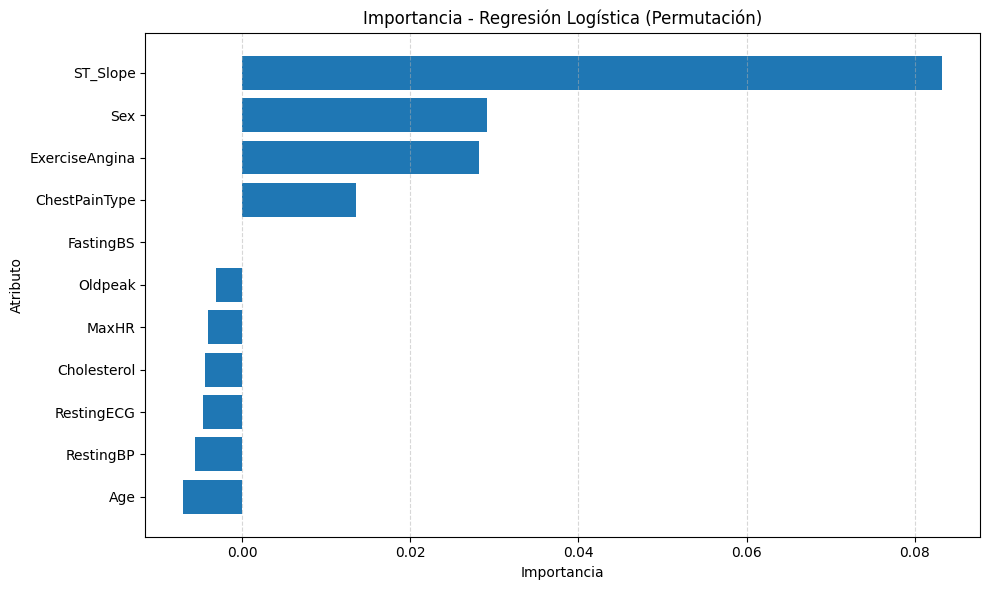

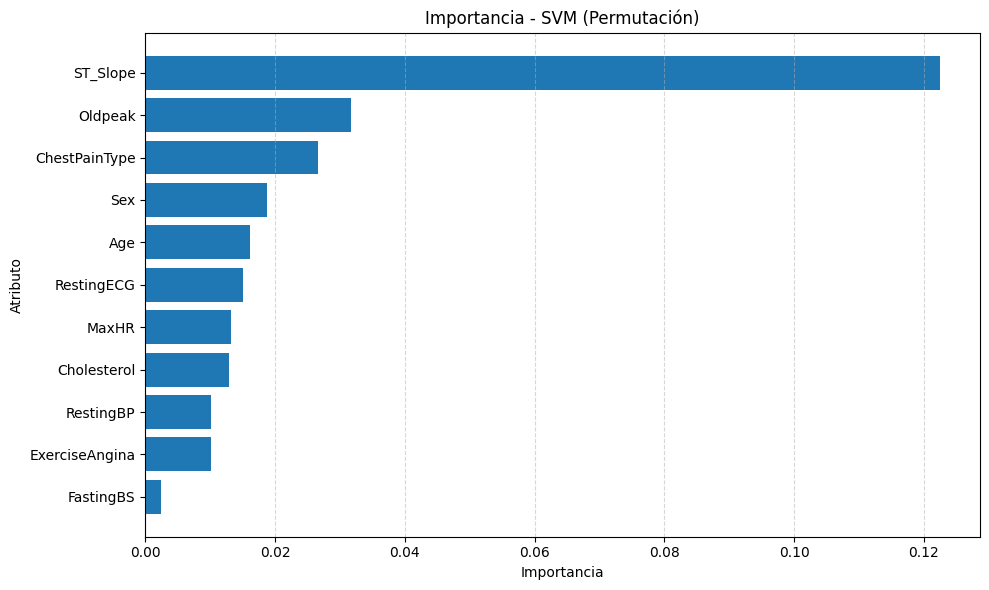

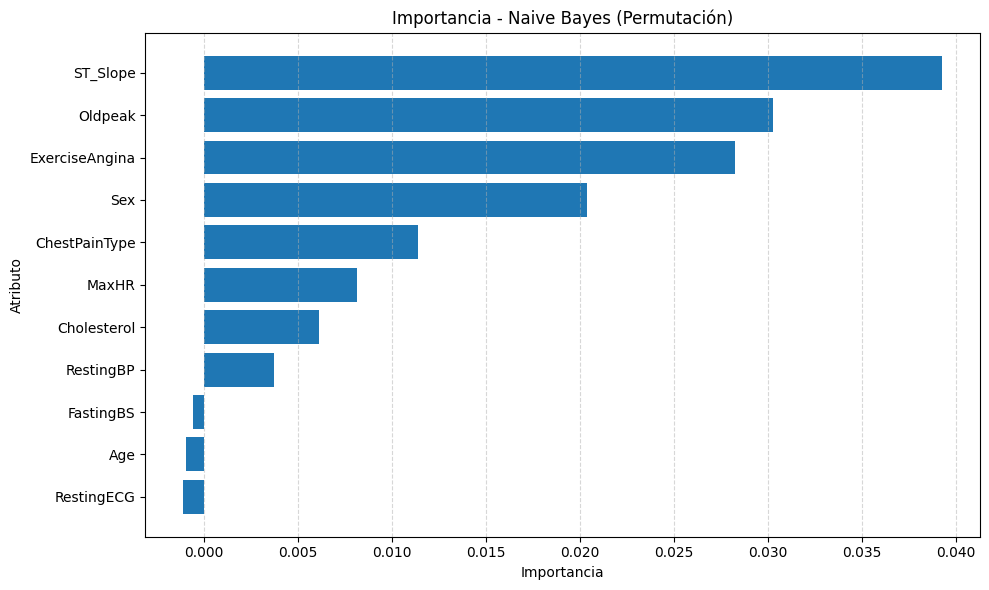

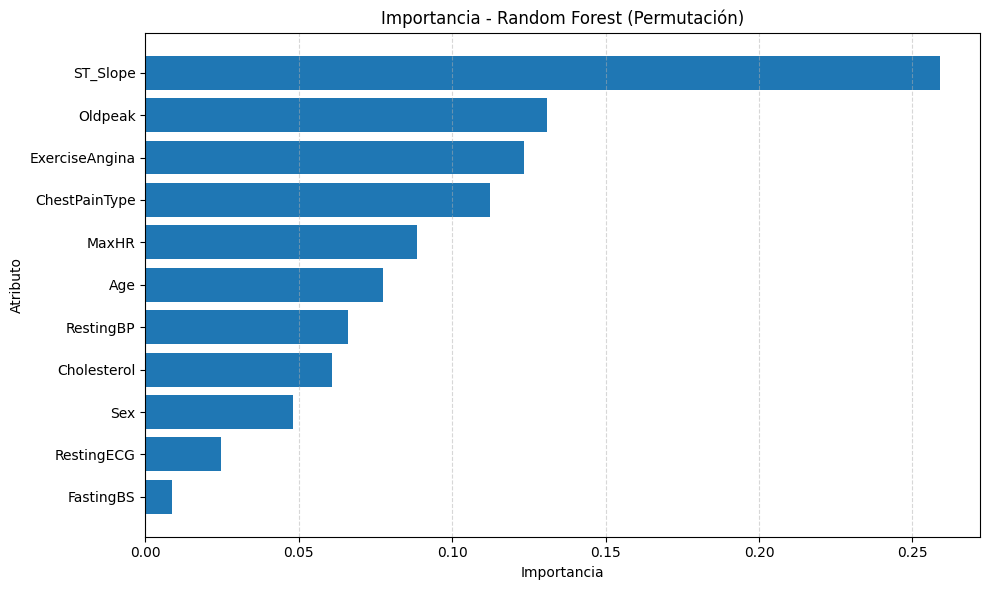

In [28]:
plot_feature_importance(feature_importances_lr, "Importancia - Regresión Logística (Permutación)")
plot_feature_importance(feature_importances_svm, "Importancia - SVM (Permutación)")
plot_feature_importance(feature_importances_gnb, "Importancia - Naive Bayes (Permutación)")
plot_feature_importance(feature_importances_rf, "Importancia - Random Forest (Permutación)")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
import time


concepto = datos.columns[-1]

atributos = []

# The original code was trying to iterate over a pandas Series as if it were a list of strings.
# We need to iterate over the index of the Series to get the attribute names.
with open("Logistic_Regression_resultados_Corazon_atributos.txt", "w") as f:
    f.write("Resultados de Regresion Logistica con validacion cruzada (5 folds) con seleccion de atributos:\n")
    f1 = []
    auc = []
    acc = []
    for atributo in feature_importances_lr.index:
      atributos += [atributo]

      scoring_funcs = {
                  "cohen_kappa": 0,
                  "accuracy": 0,
                  "precision": 0,
                  "recall": 0,
                  "f1": 0,
                  "roc_auc": 0
              }
      inicio = time.time()

      folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True)

      for x_train, y_train, x_test, y_test in folds:
                  best_lr_model.fit(x_train, y_train)
                  pred = best_lr_model.predict(x_test)
                  scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                  scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                  scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                  scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                  scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                  probs = best_lr_model.predict_proba(x_test)
                  if len(set(y_test)) == 2:
                      # binaria
                      scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                  else:
                      # multiclase
                      scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

      fin = time.time()
      tiempo_total = fin - inicio
      for key in scoring_funcs:
              scoring_funcs[key] /= len(folds)

      print(f"  Average Metrics with attributes {atributos}: {scoring_funcs}")
      print(f"  Total Time: {tiempo_total:.2f} seconds")
      f.write(f"  Average Metrics with attributes {atributos}: {scoring_funcs}, Total Time: {tiempo_total:.2f} seconds\n")
      f1.append(scoring_funcs['f1'])
      f.write(f"F1 = {f1}\n")
      auc.append(scoring_funcs['roc_auc'])
      f.write(f"AUC = {auc}\n")
      acc.append(scoring_funcs['accuracy'])
      f.write(f"Accuracy = {acc}\n")
      f.write(f"Total Time: {tiempo_total:.2f} seconds\n")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
import time

concepto = datos.columns[-1]

atributos_svm = []

# Using feature importances from SVM permutation importance
with open("SVM_resultados_Corazon_atributos.txt", "w") as f:
    f.write("Resultados de SVM con validacion cruzada (5 folds) con seleccion de atributos:\n")
    f1 = []
    auc = []
    acc = []
    for atributo in feature_importances_svm.sort_values(ascending=False).index:
      atributos_svm += [atributo]

      scoring_funcs = {
                  "cohen_kappa": 0,
                  "accuracy": 0,
                  "precision": 0,
                  "recall": 0,
                  "f1": 0,
                  "roc_auc": 0
              }
      inicio = time.time()

      folds = validacion_cruzada(datos, atributos_svm, concepto, k=5, random=True)

      for x_train, y_train, x_test, y_test in folds:
              best_svm_model.fit(x_train, y_train)
              pred = best_svm_model.predict(x_test)
              scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
              scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
              scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
              scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
              scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
              probs = best_svm_model.predict_proba(x_test)
              if len(set(y_test)) == 2:
                  # binaria
                  scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
              else:
                  # multiclase
                  scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

      fin = time.time()
      tiempo_total = fin - inicio
      for key in scoring_funcs:
              scoring_funcs[key] /= len(folds)

      print(f"  Average Metrics with attributes {atributos_svm}: {scoring_funcs}")
      print(f"  Total Time: {tiempo_total:.2f} seconds")
      f.write(f"  Average Metrics with attributes {atributos_svm}: {scoring_funcs}, Total Time: {tiempo_total:.2f} seconds\n")
      f1.append(scoring_funcs['f1'])
      f.write(f"F1 = {f1}\n")
      auc.append(scoring_funcs['roc_auc'])
      f.write(f"AUC = {auc}\n")
      acc.append(scoring_funcs['accuracy'])
      f.write(f"Accuracy = {acc}\n")
      f.write(f"Total Time: {tiempo_total:.2f} seconds\n")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
import time

concepto = datos.columns[-1]

atributos_gb = [] # Changed variable name to reflect Random Forest

# Using feature importances from Random Forest feature importance
with open("Gauss_Bayes_Corazon_atributos.txt", "w") as f: # Added file writing
    f.write("Resultados de Naive Bayes con validacion cruzada (5 folds) con seleccion de atributos:\n") # Added header
    f1 = []
    auc = []
    acc = []
    for atributo in feature_importances_gnb.sort_values(ascending=False).index:
      atributos_gb += [atributo] # Changed variable name to reflect Random Forest

      scoring_funcs = {
                  "cohen_kappa": 0,
                  "accuracy": 0,
                  "precision": 0,
                  "recall": 0,
                  "f1": 0,
                  "roc_auc": 0
              }
      inicio = time.time()

      # Use datos_multinomial for MultinomialNB
      folds = validacion_cruzada(datos, atributos_gb, concepto, k=5, random=True) # Changed datos_multinomial to datos and atributos_gnb to atributos_rf

      for x_train, y_train, x_test, y_test in folds:
                  best_gnb_model.fit(x_train, y_train)
                  pred = best_gnb_model.predict(x_test)
                  scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                  scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                  scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                  scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                  scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                  probs = best_gnb_model.predict_proba(x_test)
                  if len(set(y_test)) == 2:
                      # binaria
                      scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                  else:
                      # multiclase
                      scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

      fin = time.time()
      tiempo_total = fin - inicio
      for key in scoring_funcs:
              scoring_funcs[key] /= len(folds)

      print(f"  Average Metrics with attributes {atributos_gb}: {scoring_funcs}")
      print(f"  Total Time: {tiempo_total:.2f} seconds")
      f.write(f"  Average Metrics with attributes {atributos_gb}: {scoring_funcs}, Total Time: {tiempo_total:.2f} seconds\n") # Added writing to file
      f1.append(scoring_funcs['f1'])
      f.write(f"F1 = {f1}\n")
      auc.append(scoring_funcs['roc_auc'])
      f.write(f"AUC = {auc}\n")
      acc.append(scoring_funcs['accuracy'])
      f.write(f"Accuracy = {acc}\n")
      f.write(f"Total Time: {tiempo_total:.2f} seconds\n")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
import time

concepto = datos.columns[-1]

atributos_rf = [] # Changed variable name to reflect Random Forest

# Using feature importances from Random Forest feature importance
with open("Random_Forest_resultados_Corazon_atributos.txt", "w") as f: # Added file writing
    f.write("Resultados de Random Forest con validacion cruzada (5 folds) con seleccion de atributos:\n") # Added header
    f1 = []
    auc = []
    acc = []
    for atributo in feature_importances_rf.sort_values(ascending=False).index:
      atributos_rf += [atributo] # Changed variable name to reflect Random Forest

      scoring_funcs = {
                  "cohen_kappa": 0,
                  "accuracy": 0,
                  "precision": 0,
                  "recall": 0,
                  "f1": 0,
                  "roc_auc": 0
              }
      inicio = time.time()

      # Use datos_multinomial for MultinomialNB
      folds = validacion_cruzada(datos, atributos_rf, concepto, k=5, random=True) # Changed datos_multinomial to datos and atributos_gnb to atributos_rf

      for x_train, y_train, x_test, y_test in folds:
                  best_rf_model.fit(x_train, y_train)
                  pred = best_rf_model.predict(x_test)
                  scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                  scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                  scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                  scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                  scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                  probs = best_rf_model.predict_proba(x_test)
                  if len(set(y_test)) == 2:
                      # binaria
                      scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                  else:
                      # multiclase
                      scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

      fin = time.time()
      tiempo_total = fin - inicio
      for key in scoring_funcs:
              scoring_funcs[key] /= len(folds)

      print(f"  Average Metrics with attributes {atributos_rf}: {scoring_funcs}")
      print(f"  Total Time: {tiempo_total:.2f} seconds")
      f.write(f"  Average Metrics with attributes {atributos_rf}: {scoring_funcs}, Total Time: {tiempo_total:.2f} seconds\n") # Added writing to file
      f1.append(scoring_funcs['f1'])
      f.write(f"F1 = {f1}\n")
      auc.append(scoring_funcs['roc_auc'])
      f.write(f"AUC = {auc}\n")
      acc.append(scoring_funcs['accuracy'])
      f.write(f"Accuracy = {acc}\n")
      f.write(f"Total Time: {tiempo_total:.2f} seconds\n")

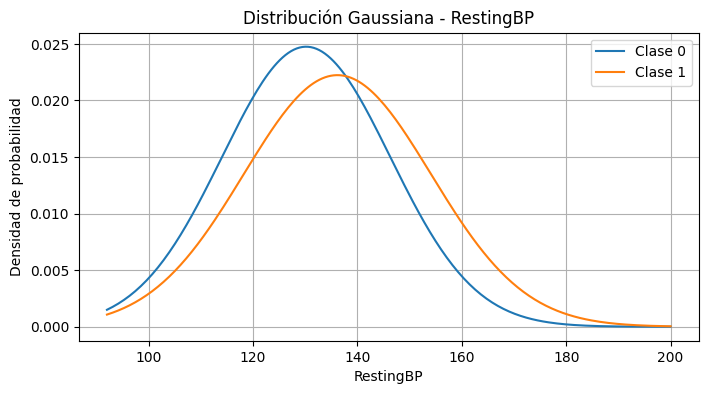

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Supongamos que ya tienes X, y, gnb (GaussianNB entrenado), y feature_names definidos
# Ejemplo: feature_names = X.columns.tolist()

# Selecciona la variable a graficar
feature_name = "RestingBP"  # Cambia esto por la variable que quieras
feature_index = datos.columns.get_loc(feature_name)
X_np = datos.to_numpy()
num_classes = 2

x_vals = np.linspace(X_np[:, feature_index].min(), X_np[:, feature_index].max(), 200)
plt.figure(figsize=(8, 4))

for cls in range(num_classes):
    mean = best_gnb_model.theta_[cls, feature_index]
    std = np.sqrt(best_gnb_model.var_[cls, feature_index])
    y_vals = norm.pdf(x_vals, mean, std)
    plt.plot(x_vals, y_vals, label=f"Clase {cls}")

plt.title(f"Distribución Gaussiana - {feature_name}")
plt.xlabel(feature_name)
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

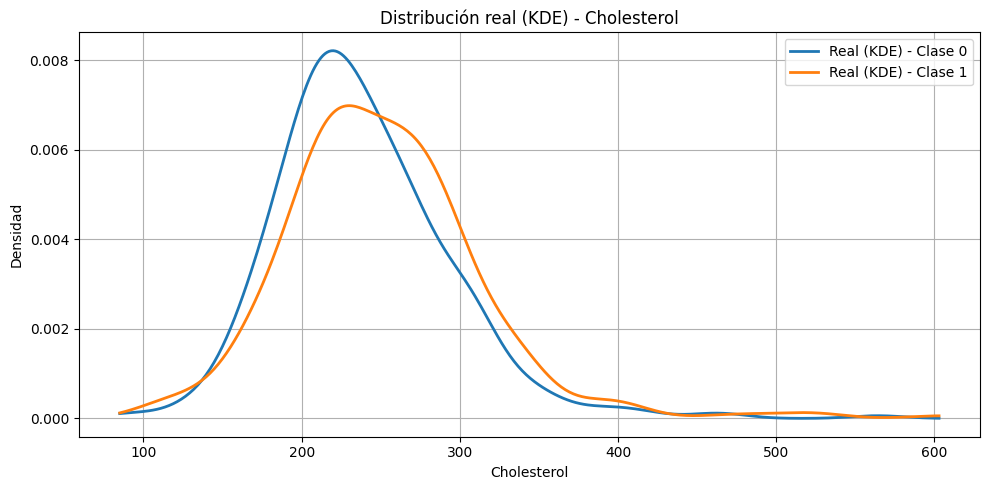

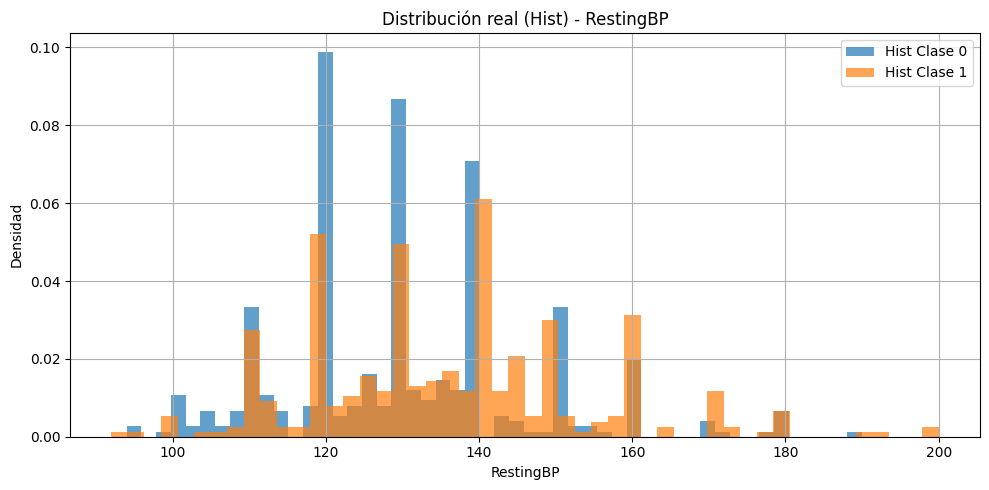

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Variable a graficar
feature_name = "Cholesterol"   # Cambia si querés otra
feature_index = datos.columns.get_loc(feature_name)

X_np = datos.to_numpy()
y_np = datos[concepto].to_numpy()
classes = np.unique(y_np)

# Rango de valores
x_vals = np.linspace(
    X_np[:, feature_index].min(),
    X_np[:, feature_index].max(),
    400
)

plt.figure(figsize=(10, 5))

for cls in classes:
    
    real_data = X_np[y_np == cls, feature_index]
    
    kde = gaussian_kde(real_data)
    kde_vals = kde(x_vals)
    
    plt.plot(
        x_vals,
        kde_vals,
        linewidth=2,
        label=f"Real (KDE) - Clase {cls}"
    )

plt.title(f"Distribución real (KDE) - {feature_name}")
plt.xlabel(feature_name)
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

feature_name = "RestingBP"
feature_index = datos.columns.get_loc(feature_name)

X_np = datos.to_numpy()
y_np = datos[concepto].to_numpy()
classes = np.unique(y_np)

plt.figure(figsize=(10, 5))

for cls in classes:

    real_data = X_np[y_np == cls, feature_index]

    # Histograma
    plt.hist(
        real_data,
        bins=50,
        density=True,
        alpha=0.7,
        label=f"Hist Clase {cls}"
    )

plt.title(f"Distribución real (Hist) - {feature_name}")
plt.xlabel(feature_name)
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


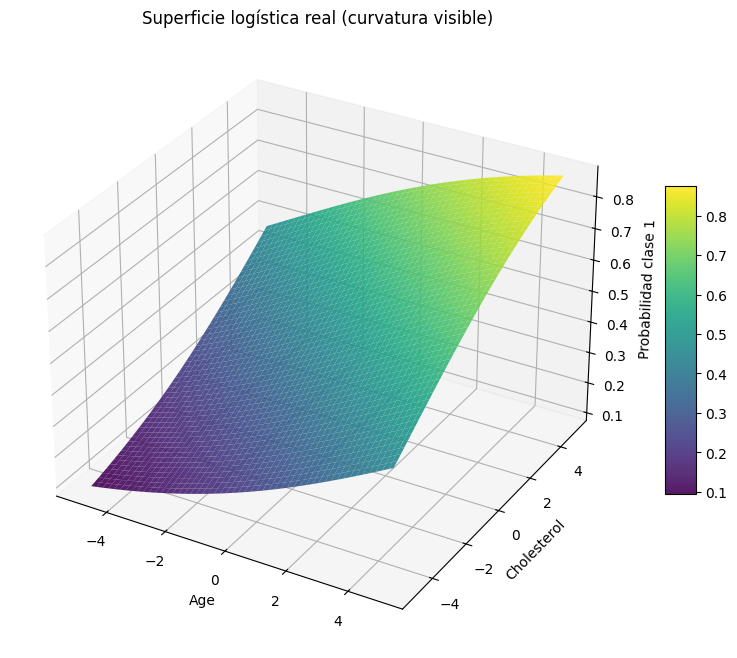

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Seleccioná dos features
feature_x = "Age"
feature_y = "Cholesterol"

# Obtener los nombres del modelo
features = best_lr_model.feature_names_in_

# Crear rangos AMPLIOS para ver la curvatura real
x_vals = np.linspace(-5, 5, 200)
y_vals = np.linspace(-5, 5, 200)

xx, yy = np.meshgrid(x_vals, y_vals)

# Media base del dataset
means = datos[features].mean()

# Construir matriz de grid
X_grid = []
for x_, y_ in zip(xx.ravel(), yy.ravel()):
    row = means.copy()
    row[feature_x] = x_
    row[feature_y] = y_
    X_grid.append(row.values)

X_grid = np.array(X_grid)

# Probabilidades predichas
probs = best_lr_model.predict_proba(X_grid)[:, 1]
probs = probs.reshape(xx.shape)

# ----- GRÁFICO 3D -----
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    xx, yy, probs,
    cmap="viridis",
    alpha=0.9,
    edgecolor='none'
)

ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel("Probabilidad clase 1")
ax.set_title("Superficie logística real (curvatura visible)")

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()


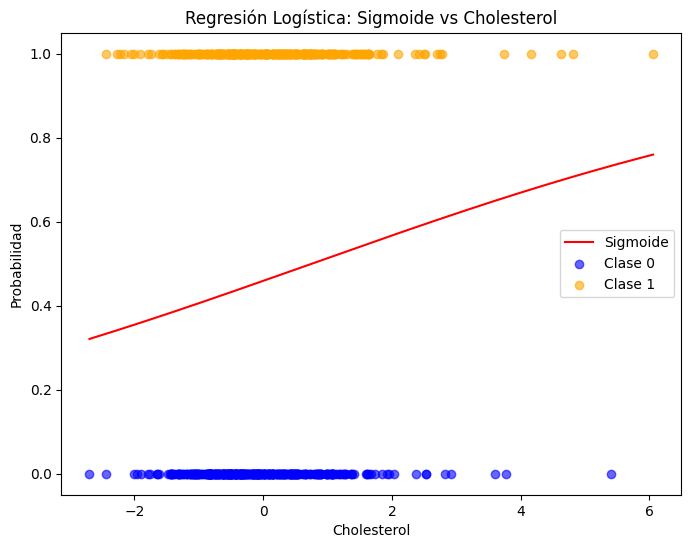

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos otras variables en su media
means = datos.drop(columns=concepto).mean()  # asumimos que la columna de clase se llama "Target"

# Rango de Cholesterol
x_vals = np.linspace(datos["Cholesterol"].min(), datos["Cholesterol"].max(), 200)

# Coeficientes
w0 = best_lr_model.intercept_[0]
coef_dict = dict(zip(best_lr_model.feature_names_in_, best_lr_model.coef_[0]))

# Calculamos z = w0 + w_chol*Cholesterol + suma(otras*medias)
z = w0 + coef_dict["Cholesterol"]*x_vals
for feat in coef_dict:
    if feat != "Cholesterol":
        z += coef_dict[feat]*means[feat]

# Función sigmoide
sigmoid = 1 / (1 + np.exp(-z))

# Graficar
plt.figure(figsize=(8,6))

# Curva sigmoide
plt.plot(x_vals, sigmoid, color='red', label="Sigmoide")

# Puntos reales: clase 0 y 1
plt.scatter(datos.loc[datos[concepto]==0, "Cholesterol"], 
            np.zeros(datos.loc[datos[concepto]==0].shape[0]), 
            color='blue', label='Clase 0', alpha=0.6)
plt.scatter(datos.loc[datos[concepto]==1, "Cholesterol"], 
            np.ones(datos.loc[datos[concepto]==1].shape[0]), 
            color='orange', label='Clase 1', alpha=0.6)

plt.xlabel("Cholesterol")
plt.ylabel("Probabilidad")
plt.title("Regresión Logística: Sigmoide vs Cholesterol")
plt.legend()
plt.show()

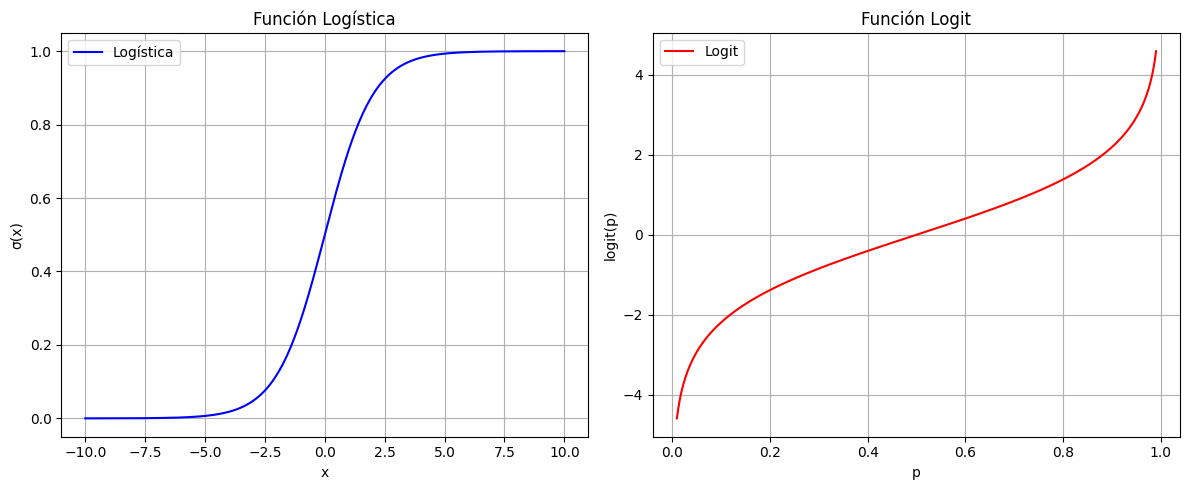

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# Definimos las funciones
# ===============================

# Función logística
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Función logit (inversa de la logística)
def logit(p):
    return np.log(p / (1 - p))

# ===============================
# Creamos los datos
# ===============================
x = np.linspace(-10, 10, 400)  # valores para la función logística
y_logistic = logistic(x)

p = np.linspace(0.01, 0.99, 400)  # valores para la función logit (evitamos 0 y 1)
y_logit = logit(p)

# ===============================
# Graficamos
# ===============================
plt.figure(figsize=(12,5))

# Gráfico de la función logística
plt.subplot(1, 2, 1)
plt.plot(x, y_logistic, color='blue', label='Logística')
plt.title('Función Logística')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.legend()

# Gráfico de la función logit
plt.subplot(1, 2, 2)
plt.plot(p, y_logit, color='red', label='Logit')
plt.title('Función Logit')
plt.xlabel('p')
plt.ylabel('logit(p)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

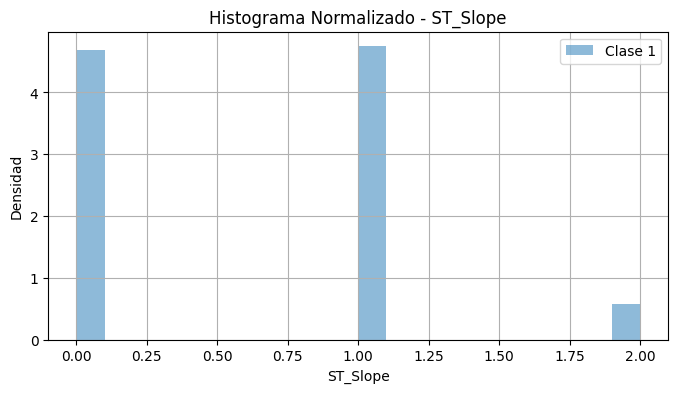

In [53]:
plt.figure(figsize=(8, 4))


data_cls = datos['ST_Slope']
plt.hist(
        data_cls,
        bins=20,
        density=True,
        alpha=0.5,
        label=f"Clase {cls}"
    )

plt.title(f"Histograma Normalizado - {feature_name}")
plt.xlabel(feature_name)
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

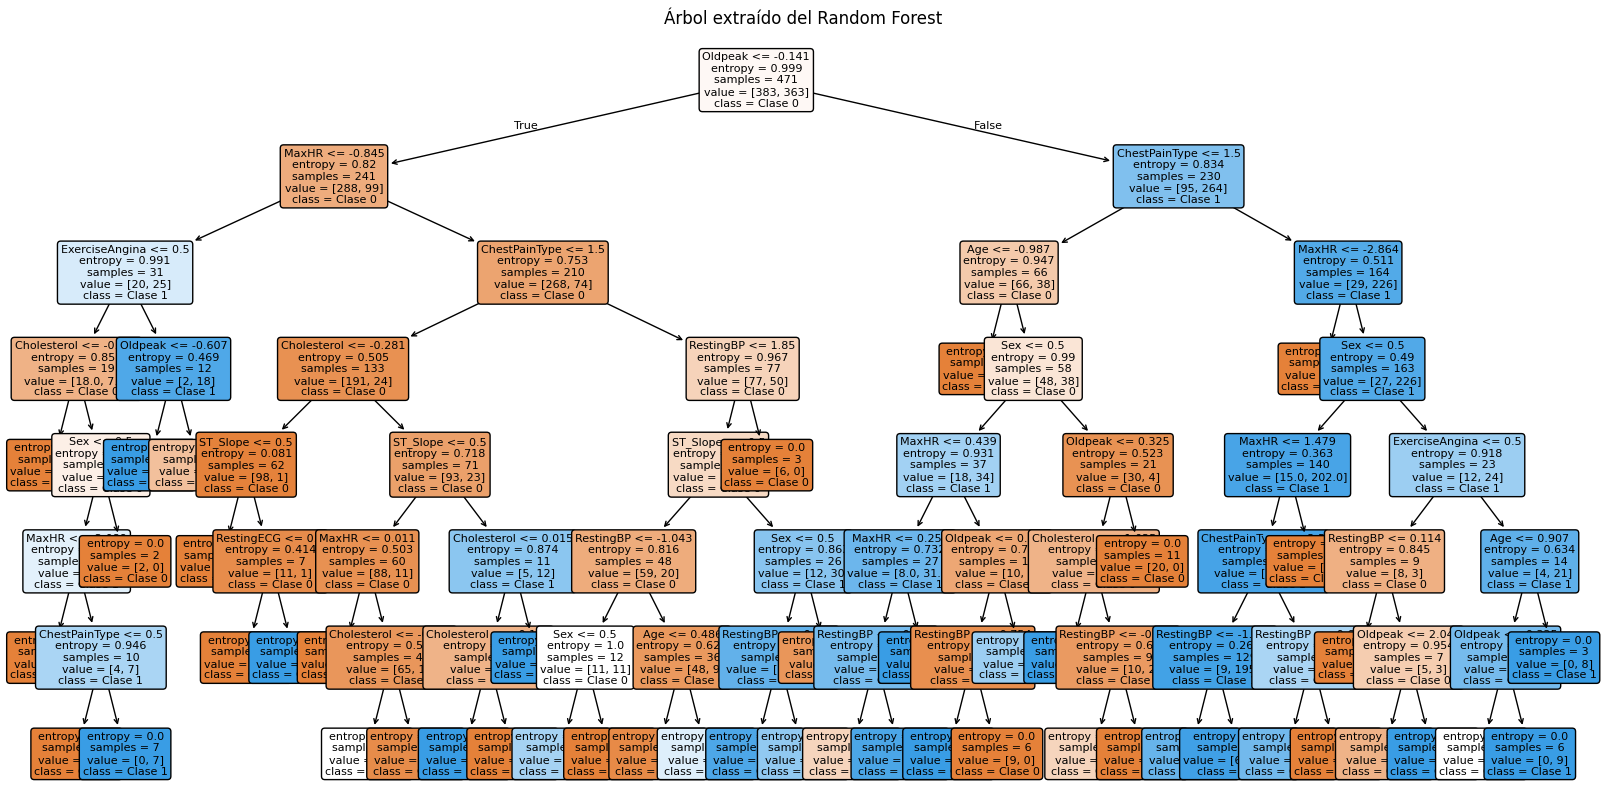

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Elegir un árbol del bosque (por ejemplo, el primero)
arbol = best_rf_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    arbol,
    feature_names=datos.columns,
    class_names=["Clase 0", "Clase 1"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Árbol extraído del Random Forest")
plt.show()

[Text(0.5, 0.875, 'x[9] <= 0.045\ngini = 0.496\nsamples = 382\nvalue = [324, 273]'),
 Text(0.25, 0.625, 'x[5] <= 0.5\ngini = 0.352\nsamples = 211\nvalue = [258, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= 0.5\ngini = 0.3\nsamples = 176\nvalue = [231, 52]'),
 Text(0.0625, 0.125, 'gini = 0.223\nsamples = 155\nvalue = [218, 32]'),
 Text(0.1875, 0.125, 'gini = 0.478\nsamples = 21\nvalue = [13, 20]'),
 Text(0.375, 0.375, 'x[4] <= -1.034\ngini = 0.498\nsamples = 35\nvalue = [27, 24]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [9, 0]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 29\nvalue = [18, 24]'),
 Text(0.75, 0.625, 'x[7] <= 0.439\ngini = 0.376\nsamples = 171\nvalue = [66, 197]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[9] <= 0.232\ngini = 0.257\nsamples = 138\nvalue = [32, 179]'),
 Text(0.5625, 0.125, 'gini = 0.457\nsamples = 34\nvalue = [18, 33]'),
 Text(0.6875, 0.125, 'gini = 0.16\nsamples = 104\nvalue = [14, 146]'),
 Text(0.875, 0.3

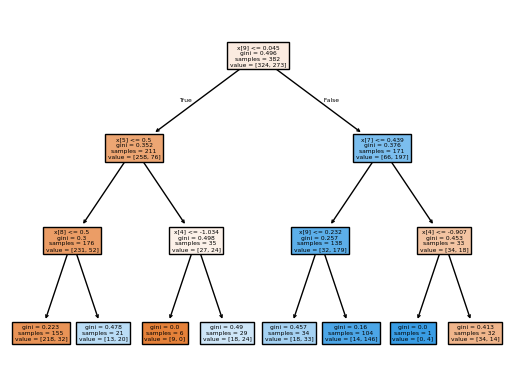

In [90]:
from sklearn.ensemble import RandomForestClassifier


rf_small = RandomForestClassifier(
                                criterion="gini",
                                max_depth=3,
                                random_state=42
                            )

folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True)

for x_train, y_train, x_test, y_test in folds:
                                    rf_small.fit(x_train, y_train)
                                    


plot_tree(rf_small.estimators_[0], filled=True)

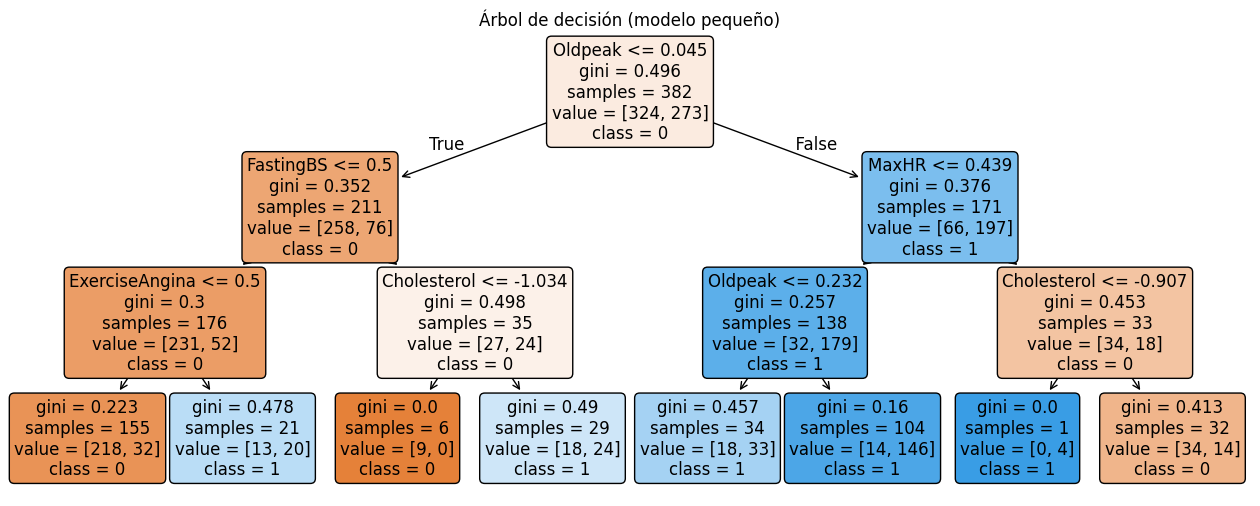

In [92]:
# Visualiza el árbol de decisión del modelo pequeño
from sklearn import tree
import matplotlib.pyplot as plt

# Supón que tu modelo pequeño se llama 'small_tree_model' y fue entrenado con 'features_pequenos'
plt.figure(figsize=(16, 6))
tree.plot_tree(
    rf_small.estimators_[0],  # Primer árbol del Random Forest pequeño

    feature_names=atributos,  # lista de nombres de las variables usadas en el modelo pequeño
    class_names=[str(c) for c in rf_small.classes_],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Árbol de decisión (modelo pequeño)")
plt.show()

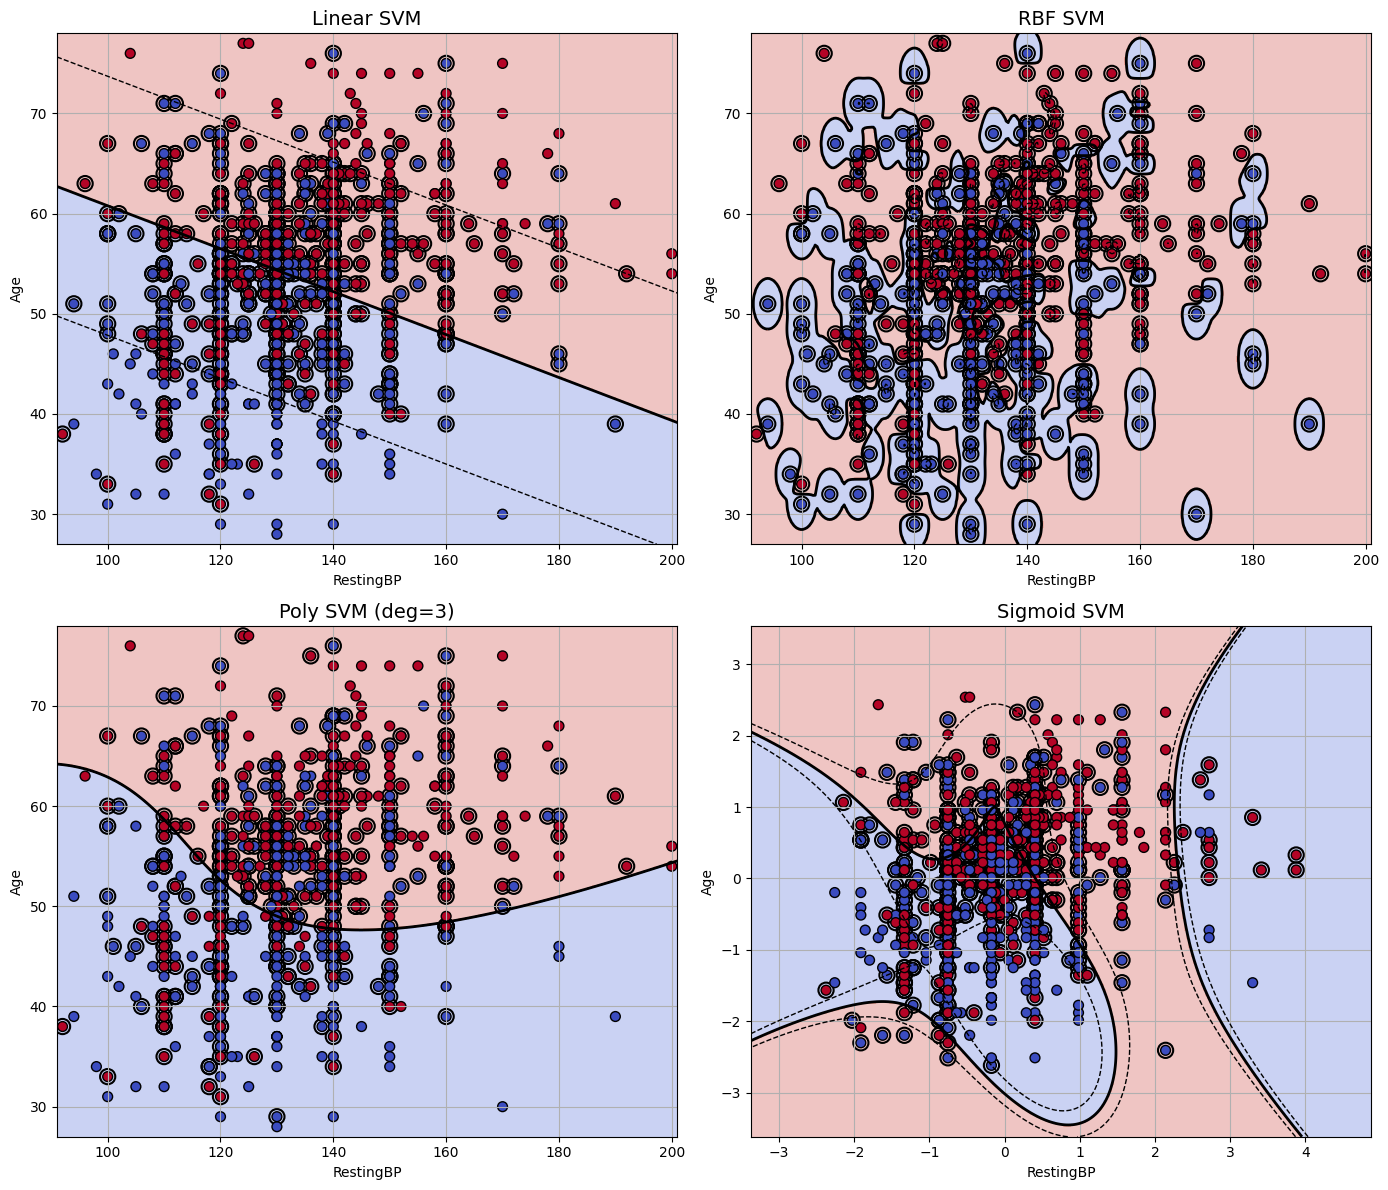

In [11]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler


# Dataset 2D
X = datos[["RestingBP", "Age"]].to_numpy()
y = datos[concepto].to_numpy()

scaler = StandardScaler()
X_sigmoid = scaler.fit_transform(X)

# Modelos
C = 1.0
models = [
    ("Linear SVM", SVC(kernel="linear", C=C), X),     # sin escalar
    ("RBF SVM", SVC(kernel="rbf", gamma=0.7, C=C), X), # sin escalar
    ("Poly SVM (deg=3)", SVC(kernel="poly", degree=3, gamma="auto", C=C), X), # sin escalar
    ("Sigmoid SVM", 
 SVC(kernel="sigmoid", gamma=0.2, coef0=-1, C=5), 
 X_sigmoid) # ESCALADO
]

# Entrenar modelos
trained = []
for name, clf, X_input in models:
    clf.fit(X_input, y)
    trained.append((name, clf, X_input))

# Preparar figura
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Función para graficar frontera + márgenes
def plot_svm(ax, name, clf, Xplot):
    # Rango del gráfico
    x_min, x_max = Xplot[:, 0].min() - 1, Xplot[:, 0].max() + 1
    y_min, y_max = Xplot[:, 1].min() - 1, Xplot[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Frontera estimada
    Z = clf.predict(grid).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

    # Hiperplano (f(x)=0) y márgenes f(x)=±1
    decision = clf.decision_function(grid).reshape(xx.shape)
    ax.contour(xx, yy, decision, levels=[0], colors="black", linewidths=2)
    ax.contour(xx, yy, decision, levels=[-1, 1],
               colors="black", linewidths=1, linestyles="--")

    # Support vectors
    sv = clf.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1],
               s=120, facecolors="none", edgecolors="k", linewidth=1.5)

    # Datos reales
    ax.scatter(Xplot[:, 0], Xplot[:, 1], c=y,
               cmap="coolwarm", edgecolor="k", s=50)

    ax.set_title(name, fontsize=14)
    ax.set_xlabel("RestingBP")
    ax.set_ylabel("Age")
    ax.grid(True)

# Graficar cada subplot
for ax, (name, clf, Xplot) in zip(axes, trained):
    plot_svm(ax, name, clf, Xplot)

plt.tight_layout()
plt.show()


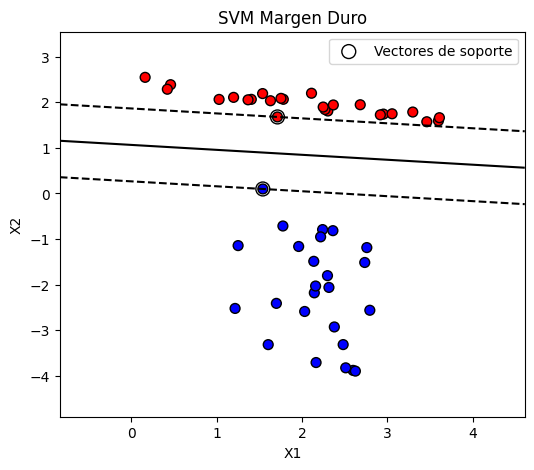

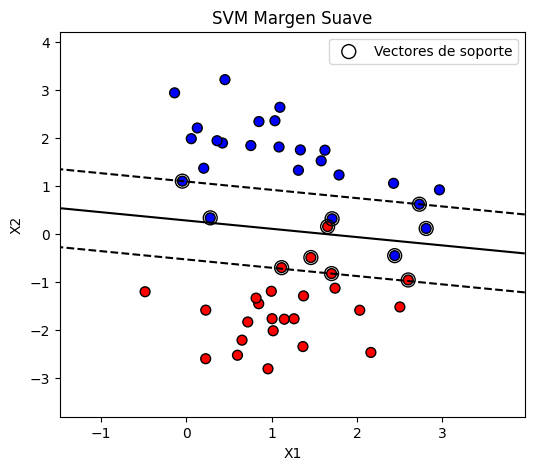

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# ---------------------------
# Dataset Hard Margin (separable)
# ---------------------------
X_hard, y_hard = make_classification(
    n_samples=50,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=2.0,  # totalmente separable
    flip_y=0,       # sin ruido
    random_state=42
)

# ---------------------------
# Dataset Soft Margin (con algo de ruido)
# ---------------------------
X_soft, y_soft = make_classification(
    n_samples=50,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.3,  # parcialmente solapado
    flip_y=0.01,     # 1% de ruido
    random_state=24
)

# ---------------------------
# Modelos SVM
# ---------------------------
svc_hard = svm.SVC(kernel='linear', C=1e6)
svc_hard.fit(X_hard, y_hard)

svc_soft = svm.SVC(kernel='linear', C=0.5)
svc_soft.fit(X_soft, y_soft)

# ---------------------------
# Función para graficar SVM
# ---------------------------
def plot_svm(svc, X, y, title):
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=50, edgecolors='k')

    # Meshgrid para frontera
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    XX, YY = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    # Fronteras y márgenes
    plt.contour(XX, YY, Z, levels=[-1,0,1], linestyles=['--','-','--'], colors='k')
    plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=100,
                facecolors='none', edgecolors='k', label='Vectores de soporte')

    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

# ---------------------------
# Graficar
# ---------------------------
plot_svm(svc_hard, X_hard, y_hard, 'SVM Margen Duro')
plot_svm(svc_soft, X_soft, y_soft, 'SVM Margen Suave')